<a href="https://colab.research.google.com/github/NikkiYng/EX2-NLP/blob/main/City_names_generator_Eng_vs_Cn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline
import json
import random

# **Data preparation**

**1. Get data from github**

In [38]:
# American City Names

# download the txt file from github
!wget https://raw.githubusercontent.com/NikkiYng/EX2-NLP/main/American_city_names_385.txt
AmCity = open('American_city_names_385.txt', 'r').read().splitlines()
len(AmCity) # number of the city names

--2024-03-04 17:39:42--  https://raw.githubusercontent.com/danielmiessler/SecLists/master/Miscellaneous/us-cities.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 207041 (202K) [text/plain]
Saving to: ‘us-cities.txt’

us-cities.txt       100%[===================>] 202.19K  --.-KB/s    in 0.02s   

2024-03-04 17:39:42 (8.19 MB/s) - ‘us-cities.txt’ saved [207041/207041]



20580

In [39]:
print("American City Names")
print(AmCity)

American City Names
['Abbeville', 'Abbotsford', 'Abbott', 'Abbottsburg', 'Abbottstown', 'Abbyville', 'Abell', 'Abercrombie', 'Aberdeen', 'Aberfoil', 'Abernant', 'Abernathy', 'Abeytas', 'Abie', 'Abilene', 'Abingdon', 'Abington', 'Abiquiu', 'Abita Springs', 'Abo', 'Aboite', 'Abraham', 'Abram', 'Abrams', 'Absarokee', 'Absecon', 'Academy', 'Accokeek', 'Accomac', 'Accord', 'Ace', 'Aceitunas', 'Acequia', 'Achille', 'Achilles', 'Ackerly', 'Ackerman', 'Ackley', 'Ackworth', 'Acme', 'Acomita Lake', 'Acra', 'Acree', 'Acton', 'Acworth', 'Acy', 'Ada', 'Adair', 'Adair Village', 'Adairsville', 'Adairville', 'Adams', 'Adams Center', 'Adams City', 'Adamstown', 'Adamsville', 'Adario', 'Addicks', 'Addie', 'Addieville', 'Addington', 'Addis', 'Addison', 'Addy', 'Addyston', 'Adel', 'Adelaide', 'Adelanto', 'Adelino', 'Adell', 'Adelphi', 'Adelphia', 'Aden', 'Adena', 'Adgateville', 'Adin', 'Adjuntas', 'Admire', 'Adna', 'Adona', 'Adrian', 'Advance', 'Adwolf', 'Ady', 'Aetna', 'Affton', 'Afton', 'Agar', 'Agate', 

In [4]:
#Chinese City Names

# download the json file from github
!wget https://raw.githubusercontent.com/NikkiYng/EX2-NLP/main/Chinese_citys.json
with open('Chinese_citys.json', 'r',encoding= 'utf-8') as f:
  data = json.load(f)

city_list = data['provinces']# cities are arranged by the order of their provinces
Chcity = []
# create a list with just the city names
for i in city_list:
    city = i['citys']
    city_names = [d['cityName'] for d in city]
    for a in city_names:
        Chcity.append(a.replace('市','')) #each city is called "xx City" in the original dataset, here we remove the word "city"

Chcity = Chcity[:385]# make the number even for the two languages
len(Chcity)# number of the city names

--2024-03-04 16:18:47--  https://raw.githubusercontent.com/NikkiYng/EX2-NLP/main/Chinese_citys.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40998 (40K) [text/plain]
Saving to: ‘Chinese_citys.json’

Chinese_citys.json  100%[===================>]  40.04K  --.-KB/s    in 0.003s  

2024-03-04 16:18:47 (11.9 MB/s) - ‘Chinese_citys.json’ saved [40998/40998]



385

In [5]:
print("Chinese City Names")
print(Chcity)

Chinese City Names
['北京', '天津', '上海', '重庆', '香港特别行政区', '澳门特别行政区', '石家庄', '唐山', '秦皇岛', '邯郸', '邢台', '保定', '张家口', '承德', '沧州', '廊坊', '衡水', '辛集', '晋州', '新乐', '遵化', '迁安', '武安', '南宫', '沙河', '涿州', '定州', '安国', '高碑店', '平泉', '泊头', '任丘', '黄骅', '河间', '霸州', '三河', '深州', '太原', '大同', '阳泉', '长治', '晋城', '朔州', '晋中', '运城', '忻州', '临汾', '吕梁', '古交', '高平', '介休', '永济', '河津', '原平', '侯马', '霍州', '孝义', '汾阳', '怀仁', '呼和浩特', '包头', '乌海', '赤峰', '通辽', '鄂尔多斯', '呼伦贝尔', '巴彦淖尔', '乌兰察布', '霍林郭勒', '满洲里', '牙克石', '扎兰屯', '额尔古纳', '根河', '丰镇', '乌兰浩特', '阿尔山', '二连浩特', '锡林浩特', '沈阳', '大连', '鞍山', '抚顺', '本溪', '丹东', '锦州', '营口', '阜新', '辽阳', '盘锦', '铁岭', '朝阳', '葫芦岛', '新民', '瓦房店', '庄河', '海城', '东港', '凤城', '凌海', '北镇', '盖州', '大石桥', '灯塔', '调兵山', '开原', '北票', '凌源', '兴城', '长春', '吉林', '四平', '辽源', '通化', '白山', '松原', '白城', '榆树', '德惠', '蛟河', '桦甸', '舒兰', '磐石', '公主岭', '双辽', '梅河口', '集安', '洮南', '大安', '临江', '延吉', '图们', '敦化', '珲春', '龙井', '和龙', '扶余', '哈尔滨', '齐齐哈尔', '黑河', '大庆', '伊春', '鹤岗', '佳木斯', '双鸭山', '七台河', '鸡西', '牡丹江', '绥化', '尚志', '五常', '讷河', '北安', '五大连池', '嫩江

**2. Build the vocabulary of characters and mappings to integers**

In [40]:
#American cities
chars1 = sorted(list(set(''.join(AmCity))))
stoi1 = {s:i+1 for i,s in enumerate(chars1)}
stoi1['.'] = 0
itos1 = {i:s for s,i in stoi1.items()}
print(itos1)
#Chinese cities
chars2 = sorted(list(set(''.join(Chcity))))
stoi2 = {s:i+1 for i,s in enumerate(chars2)}
stoi2['.'] = 0
itos2 = {i:s for s,i in stoi2.items()}
print(itos2)

{1: ' ', 2: "'", 3: '(', 4: ')', 5: ',', 6: '-', 0: '.', 8: 'A', 9: 'B', 10: 'C', 11: 'D', 12: 'E', 13: 'F', 14: 'G', 15: 'H', 16: 'I', 17: 'J', 18: 'K', 19: 'L', 20: 'M', 21: 'N', 22: 'O', 23: 'P', 24: 'Q', 25: 'R', 26: 'S', 27: 'T', 28: 'U', 29: 'V', 30: 'W', 31: 'X', 32: 'Y', 33: 'Z', 34: '`', 35: 'a', 36: 'b', 37: 'c', 38: 'd', 39: 'e', 40: 'f', 41: 'g', 42: 'h', 43: 'i', 44: 'j', 45: 'k', 46: 'l', 47: 'm', 48: 'n', 49: 'o', 50: 'p', 51: 'q', 52: 'r', 53: 's', 54: 't', 55: 'u', 56: 'v', 57: 'w', 58: 'x', 59: 'y', 60: 'z'}
{1: '七', 2: '三', 3: '上', 4: '丘', 5: '东', 6: '中', 7: '丰', 8: '临', 9: '丹', 10: '为', 11: '主', 12: '丽', 13: '义', 14: '乌', 15: '乐', 16: '九', 17: '乡', 18: '乳', 19: '二', 20: '云', 21: '五', 22: '井', 23: '交', 24: '京', 25: '亳', 26: '仁', 27: '介', 28: '仓', 29: '仪', 30: '们', 31: '任', 32: '伊', 33: '休', 34: '伦', 35: '余', 36: '作', 37: '佳', 38: '侯', 39: '保', 40: '信', 41: '偃', 42: '光', 43: '克', 44: '公', 45: '六', 46: '兰', 47: '共', 48: '兴', 49: '兵', 50: '冈', 51: '凌', 52: '凤', 53: '别',

**3. Create a three-fold dataset**

In [41]:
# American cities

# build the dataset
block_size = 3 # take 3 characters to predict the next one

def build_dataset(words):
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi1[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

# prepare the data splits
random.seed(42)
random.shuffle(AmCity)
n1 = int(0.8*len(AmCity))
n2 = int(0.9*len(AmCity))

Xtr, Ytr = build_dataset(AmCity[:n1])
Xdev, Ydev = build_dataset(AmCity[n1:n2])
Xte, Yte = build_dataset(AmCity[n2:])

torch.Size([165930, 3]) torch.Size([165930])
torch.Size([20616, 3]) torch.Size([20616])
torch.Size([20495, 3]) torch.Size([20495])


In [8]:
# the Chinese one
block_size2 = 1 # take 1 character to predict the next one

def build_dataset_cn(words):
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size2
    for ch in w + '.':
      ix2 = stoi2[ch]
      X.append(context)
      Y.append(ix2)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix2] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

# prepare the data splits
random.seed(40)
random.shuffle(Chcity)
n1 = int(0.8*len(Chcity))
n2 = int(0.9*len(Chcity))

Xtr1, Ytr1 = build_dataset_cn(Chcity[:n1])
Xdev1, Ydev1 = build_dataset_cn(Chcity[n1:n2])
Xte1, Yte1 = build_dataset_cn(Chcity[n2:])

torch.Size([969, 1]) torch.Size([969])
torch.Size([126, 1]) torch.Size([126])
torch.Size([124, 1]) torch.Size([124])


#**Train the model**

**1. Set up parameters**

In [9]:
# set up the parameters
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((53, 10), generator=g) # 52 is the max index
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 53), generator=g)
b2 = torch.randn(53, generator=g) # match W2's second dimension
parameters = [C, W1, b1, W2, b2]
sum(p.nelement() for p in parameters) # number of parameters in total

17383

In [10]:
# enable gradient computation
for p in parameters:
  p.requires_grad = True

# set up learning rate
lre = torch.linspace(-3, 0, 1000) # a tensor of 1000 points evenly spaced between -3 and 0
lrs = 10**lre

# initializw lists for tracking
lri = []
lossi = []
stepi = []

**2. Train the models**

In [11]:
for i in range(200000): # iterate 200,000 times

  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,)) # create a batch size of 32

  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 53) # match b2's shape
  loss = F.cross_entropy(logits, Ytr[ix])
  #print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  #lr = lrs[i]
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  #lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

#print(loss.item())

**Similar steps, but for chinese**

In [31]:
# the Chinese one

# set up the parameters
g_cn = torch.Generator().manual_seed(2147483647) # for reproducibility
C_cn = torch.randn((391, 10), generator=g_cn) # 391 is the max index
W1_cn = torch.randn((10, 200), generator=g_cn)
b1_cn = torch.randn(200, generator=g_cn)
W2_cn = torch.randn((200, 391), generator=g_cn)
b2_cn = torch.randn(391, generator=g) # match W2's second dimension
parameters_cn = [C_cn, W1_cn, b1_cn, W2_cn, b2_cn]
sum(p.nelement() for p in parameters_cn) # number of parameters in total

# enable gradient computation
for p in parameters_cn:
  p.requires_grad = True

# set up learning rate
lre_cn = torch.linspace(-3, 0, 1000) # a tensor of 1000 points evenly spaced between -3 and 0
lrs_cn = 10**lre_cn

# initializw lists for tracking
lri_cn = []
lossi_cn = []
stepi_cn = []

for i in range(200000):  # iterate 200,000 times
    # minibatch construct
    ix_cn = torch.randint(0, Xtr1.shape[0], (32,))

    # forward pass
    emb_cn = C_cn[Xtr1[ix_cn]]  # assuming Xtr1 is a list of indices
    h_cn = torch.tanh(emb_cn.view(-1, 10) @ W1_cn + b1_cn)
    logits_cn = h_cn @ W2_cn + b2_cn
    loss_cn = F.cross_entropy(logits_cn, Ytr1[ix_cn])

    # backward pass
    loss_cn.backward()

    # update
    lr_cn = 0.1 if i < 100000 else 0.01
    for p in parameters_cn:
        if p.grad is not None:
            p.data -= lr_cn * p.grad

    # zero out gradients for the next iteration
    for p in parameters_cn:
        p.grad = None

    # track stats
    stepi_cn.append(i)
    lossi_cn.append(loss_cn.log10().item())



# **Evaluation**

**American cities**

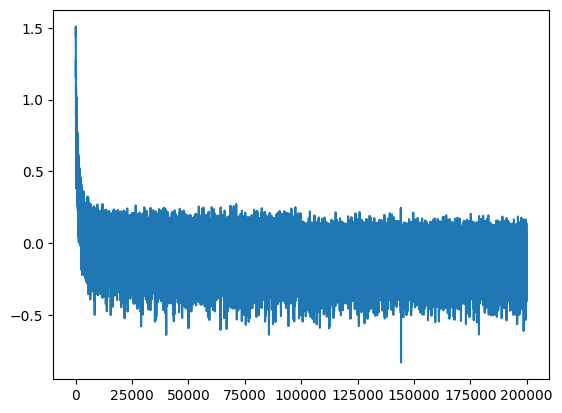

In [13]:
plt.plot(stepi, lossi)

In [14]:
# training loss
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(0.8235, grad_fn=<NllLossBackward0>)

In [15]:
# validation loss
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 53)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(6.1752, grad_fn=<NllLossBackward0>)

In [16]:
# test loss
emb = C[Xte] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 53)
loss = F.cross_entropy(logits, Yte)
loss

tensor(6.6686, grad_fn=<NllLossBackward0>)

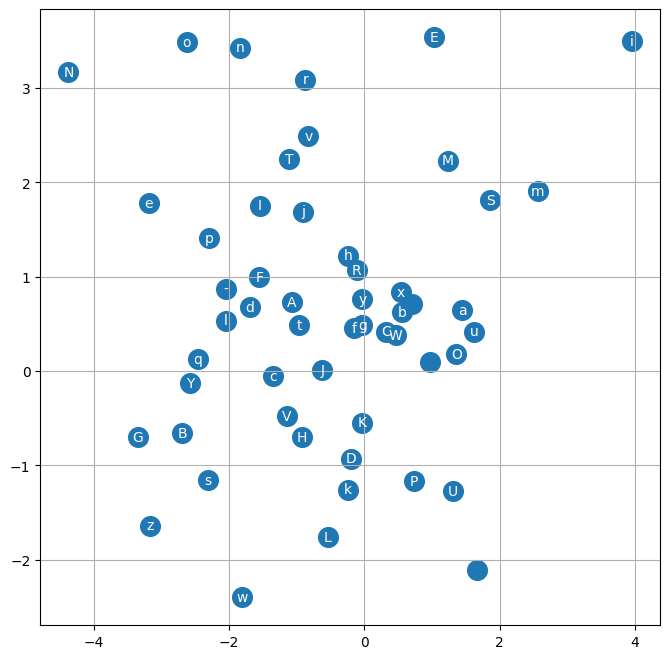

In [17]:
# Visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)  # Assuming C is a 2D tensor
for i in range(C.shape[0]):
    # Subtract 1 from the index if itos1 starts from 1
    char_index = i + 1  # Adjust index to match itos1 keys
    if char_index in itos1:  # Check if the index exists in itos1
        plt.text(C[i, 0].item(), C[i, 1].item(), itos1[char_index], ha="center", va="center", color='white')
plt.grid('minor')

**Chinese cities**

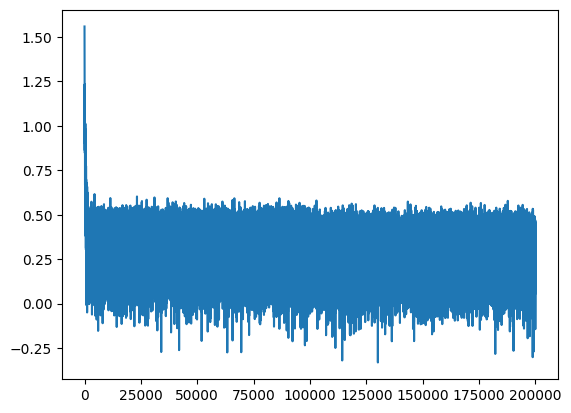

In [32]:
plt.plot(stepi_cn, lossi_cn)
plt.show()

In [33]:
# training loss
emb_cn = C_cn[Xtr1] # (32, 3, 2)
h_cn = torch.tanh(emb_cn.view(-1, 10) @ W1_cn + b1_cn) # (32, 100)
logits_cn = h_cn @ W2_cn + b2_cn # (32, 27)
loss_cn = F.cross_entropy(logits_cn, Ytr1)
loss_cn

tensor(1.9982, grad_fn=<NllLossBackward0>)

In [34]:
# validation loss
emb_cn = C_cn[Xdev1] # (32, 3, 2)
h_cn = torch.tanh(emb_cn.view(-1, 10) @ W1_cn + b1_cn) # (32, 100)
logits_cn = h_cn @ W2_cn + b2_cn # (32, 27)
loss_cn = F.cross_entropy(logits_cn, Ydev1)
loss_cn

tensor(13.7033, grad_fn=<NllLossBackward0>)

In [35]:
# test loss
emb_cn = C_cn[Xte1] # (32, 3, 2)
h_cn = torch.tanh(emb_cn.view(-1, 10) @ W1_cn + b1_cn) # (32, 100)
logits_cn = h_cn @ W2_cn + b2_cn # (32, 27)
loss_cn = F.cross_entropy(logits_cn, Yte1)
loss_cn

tensor(14.4344, grad_fn=<NllLossBackward0>)

# **Sample analysis**

**Generate American city names**

In [36]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(100):

    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break

    print(''.join(itos1[i] for i in out))

Bryan.
Johnson.
Pland Paul.
Boise City.
Greenver.
Pittle Beach.
Spokaneohe.
Bremven.
Tyler.
Charles.
Orleansacola.
GreenBay.
Delton.
Seaside.
Olathedral Springton.
Scottsdale.
Wilminster.
Inglewood.
Rale.
Barbara.
Stockford.
Laredo.
Flington.
Vero Beach.
Antica.
Santa Bay.
Wilminster.
Milwaukeepsie.
Honolumbus.
Lance.
Bridgeport-Biloxi.
Concouver.
Miami.
Milwaukee.
Lansing.
Pittsdale.
Duluth Las Vegas.
Bel Air.
Bloo.
McHenry.
Provina.
Miami.
Tyler.
Spokane.
Bel Air.
Stamford.
Detroit.
Littsdale.
Mont.
Birmington.
Irvington.
Lansington.
Syracuse.
Macoln.
Carysville.
Providence.
Fitchburgh.
Round Oaks.
Independaleigh.
Green.
Laredo.
Laredo.
Fort Wort Worth Charland.
Antiochester.
Tulsa.
Dallaha.
Tallas.
Albuque.
Grance.
Topeka.
Norwalk.
Elk Grove.
Napeake.
Glenton.
Nort Covidence.
San Diegon.
More.
Omahassee.
Tylerton.
Richmont.
Fayette.
Tempe.
Lansingtona.
Salt Lake Bincola.
Garlest Coungs.
Charles.
Denvilley.
Akrona.
Atland.
Nort.
Newburg.
Nashua.
Dalley.
Honolulu.
Littsburg.
Elkharles

**Generate Chinese city names**

In [37]:
# sample from the model
g_cn = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(100):

    out1 = []
    context = [0] * block_size2 # initialize with all ...
    while True:
      emb_cn = C_cn[torch.tensor([context])] # (1,block_size,d)
      h_cn = torch.tanh(emb_cn.view(1, -1) @ W1_cn + b1_cn)
      logits_cn = h_cn @ W2_cn + b2_cn
      probs_cn = F.softmax(logits_cn, dim=1)
      ix_cn = torch.multinomial(probs_cn, num_samples=1, generator=g_cn).item()
      context = context[1:] + [ix_cn]
      out1.append(ix_cn)
      if ix_cn == 0:
        break

    print(''.join(itos2[i] for i in out1))

大连池州.
兴.
宁安.
讷河.
宁波.
禹城.
河.
宜兴城.
开封.
桦甸.
诸城.
北票.
贵溪.
辽阳.
兴.
磐石.
密.
原.
沙河.
乐陵.
长垣.
靖江.
遵化.
德兴.
通辽阳.
台州.
招远.
福州.
武安.
二连浩特.
武安.
临汾.
莱阳泉.
衢州.
新乐.
项城.
淮南京.
张家口.
泰兴.
海城.
德惠.
图们.
晋城.
聊城.
东阳.
福清.
齐齐州.
慈溪.
平泉州.
临海安.
菏泽.
济宁国.
兰屯.
长.
大庆.
武安.
镇.
界首.
龙井.
晋城.
瑞安.
仪征.
邯郸.
太原.
北京.
河.
晋城.
牡丹阳.
长治.
金华.
界首.
苏州.
郑州.
榆树.
高碑店.
江.
常熟.
长春.
北镇.
辛集.
凌海.
仪征.
深州.
榆树.
海宁.
扎兰浩特别行政区.
肥城.
蚌埠.
宁国.
长葛.
新乐.
吕梁.
北安.
南安庆.
鄂尔.
长垣.
鸡西.
临江.
台.
抚顺.
